<a href="https://colab.research.google.com/github/BrendaChepkoech/Financial-inclusion-in-East-Africa/blob/main/Brenda_Chepkoech_week_2_IP_Statistics_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> The research question is to figure out how we can predict which individuals are most likely to have or use a bank account. The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### b) Defining the Metric for Success

Being able to predict which individuals are most likely to have or use a bank account as this will help provide an indication of the state of financial inclusion in East Africa.

### c) Understanding the context 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes

### d) Recording the Experimental Design

Reading the datasets into our environment.
Tidying the data by checking for outliers, null values and duplicates and dealing with them.
Performing univariate, bivariate and multivariate analysis and recording the observations.
Implementing the solution by performing the respective analysis i.e. principal component analysis and discriminant analysis.
Challenge your solution by providing insights on how you can make improvements.

### e) Data Relevance

The data we have is relevant since we need key demographic factors such as age, income, household size, gender, marital status, type of job and level of education to provide an indication of the state of financial inclusion in the respective countries.

Dataset

The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018. Dataset Files:

Variable Definitions: http://bit.ly/VariableDefinitions (Links to an external site.)

Dataset: http://bit.ly/FinancialDataset (Links to an external site.)

## 2. Reading the Data

In [1]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2:Loading the Data from the source i.e. csv
# ---
#url = "http://bit.ly/FinancialDataset"
df= pd.read_csv("http://bit.ly/FinancialDataset")


In [3]:
#Step 3: Loading the Variable Definitions dataset
#url ="http://bit.ly/VariableDefinitions"

df2= pd.read_csv("http://bit.ly/VariableDefinitions")
df2

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
df.shape

(23524, 13)

In [5]:
# Previewing the top of our dataset
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Previewing the bottom of our dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [8]:
# Getting to know more about the dataset by accessing its information
print(df.columns)

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')


In [9]:
#Checking if column names match with variable definition
df2['Variable Definitions']

0                    country
1                       year
2                   uniqueid
3              location_type
4           cellphone_access
5             household_size
6          age_of_respondent
7       gender_of_respondent
8     relationship_with_head
9             marital_status
10           education_level
11                  job_type
Name: Variable Definitions, dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### Validation

## 5. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


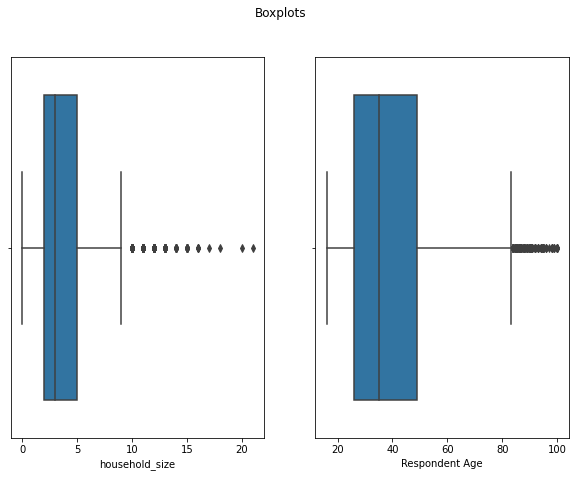

In [10]:
# Checking for outliers
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['household_size'], ax=ax1)
sns.boxplot(df['Respondent Age'], ax=ax2)
plt.show()

In [11]:
# Determining the no. of records in our dataset so that we can compare after remo=ving the ouliers
df.shape

(23524, 13)

In [12]:
# Checking for Outliers
#
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'


df= df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset

print(df.shape)


(22903, 13)


In [13]:
# Identifying the Missing Data
#
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [14]:
#Dealing with Missing Data(dropping missing data)
df.dropna(inplace=True)


In [15]:
# Printing the shape of our new dataset
df.shape

(22725, 13)

In [16]:
# Dealing with the Missing Data
#checking for duplicates
df.duplicated().sum()

0

In [17]:
# More data cleaning procedures
#Dropping the irrelevant columns
df.drop(df[["uniqueid","The relathip with head","marital_status"]],axis=1,inplace=True)
df.head(5)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [18]:
# Dropping irrelevant data
# The year column has years > 2018 so we drop them
df.drop(df[df['year'] > 2018].index, inplace=True)
df.head(5)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [19]:
# converting the year column to datetime datatype
#
#df['year']=pd.to_datetime(df['year'])
#df.dtypes

## 6. Exploratory Analysis

# 6.1 Univariate Data Analysis


# Measures of Central Tendency

In [20]:
#Numerical variables
#Measures of central tendency for the household size
#Mode 
household_mode = df['household_size'].mode()
print("The mode of the household size is: '\n", household_mode)
print('\n')

# Median
household_median = df['household_size'].median()
print("The median of the household size: ", household_median)
print('\n')

# Mean 
household_mean = df['household_size'].mean()
print("The average household size is: ", household_mean)


The mode of the household size is: '
 0    2.0
dtype: float64


The median of the household size:  3.0


The average household size is:  3.57984598459846


In [21]:
# Measures of central tendency for the respondents' age

# Median
median_age = df['Respondent Age'].median()
print("The median of the respondents' age is: \n", median_age)
print('\n')
# Mean
mean_age = df['Respondent Age'].mean()
print("The average respondents' age is: ", mean_age)
print('\n')
# Mode 
mode_age = df['Respondent Age'].mode()
print("The mode of the respondents' age is: \n", mode_age)


The median of the respondents' age is: 
 35.0


The average respondents' age is:  38.34798679867987


The mode of the respondents' age is: 
 0    30.0
dtype: float64


# Measures of Dispersion/Variability/Spread

In [22]:
# Measures of dispersion for the respondents' age

# Standard deviation of respondents age
std_age = df['Respondent Age'].std()
print("The standard deviation of the respondents' age is: ", std_age)
# Standard deviation of household_size
household_std = df['household_size'].std()
print("The standard deviation of household size is: ", household_std)


The standard deviation of the respondents' age is:  15.806141256107674
The standard deviation of household size is:  2.080542136724138


In [23]:
# Variance of respondents age
age_var = df['Respondent Age'].var()
print("The variance of the respondents' age is: ", age_var)
# Variance of household_size
household_var = df['household_size'].var()
print("The variance of household size is: ", household_std)

The variance of the respondents' age is:  249.83410140802906
The variance of household size is:  2.080542136724138


In [24]:
# Range
#Rage of household_size and respondent age
range= (df["household_size"].max())-(df["household_size"].min())
print("The range of household_size is:  ",range)
range2= (df["Respondent Age"].max())-(df["Respondent Age"].min())
print("The range of Respondent Age is:  ",range2)

The range of household_size is:   9.0
The range of Respondent Age is:   67.0


In [25]:
# Finding the quantiles of household_size
q_household = df["household_size"].quantile([0.25,0.5,0.75])
print(q_household)
# Finding the quantiles of Respondent Age
q_respondent = df["Respondent Age"].quantile([0.25,0.5,0.75])
print(q_respondent)

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64
0.25    26.0
0.50    35.0
0.75    48.0
Name: Respondent Age, dtype: float64


In [26]:
# Determining the skeweness
house_skew= df["household_size"].skew()
print("The skewness of the household size is: \n", house_skew)
if house_skew == 0:
  print("The distribution is symmetrical")
elif house_skew > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

The skewness of the household size is: 
 0.6058745818063943
The distribution is positively skewed




In [27]:
# Determining the kurtosis 
House_kurt= df["household_size"].kurt()
print("The kurtosis of the household size is: \n", House_kurt)
if House_kurt > 0:
  print("The household size column is leptokurtic")
elif House_kurt < 0:
  print("The household size is platykurtic")
else:
  print("The household size is mesokurtic")
print('\n') 

The kurtosis of the household size is: 
 -0.5055780598336774
The household size is platykurtic




In [28]:
#Displaying the summary statistics of the dataframe
#
HS= df["household_size"].describe()
RA= df["Respondent Age"].describe()
print(HS)
print(RA)

count    22725.000000
mean         3.579846
std          2.080542
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: household_size, dtype: float64
count    22725.000000
mean        38.347987
std         15.806141
min         16.000000
25%         26.000000
50%         35.000000
75%         48.000000
max         83.000000
Name: Respondent Age, dtype: float64


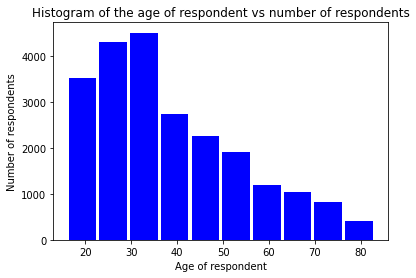

In [29]:
#creating a histogram for age of the respondent
resp_age = df['Respondent Age']
plt.hist(resp_age, bins=10, histtype='bar', rwidth=0.9,color= "blue")
plt.title("Histogram of the age of respondent vs number of respondents")
plt.xlabel("Age of respondent")
plt.ylabel("Number of respondents")
plt.show()

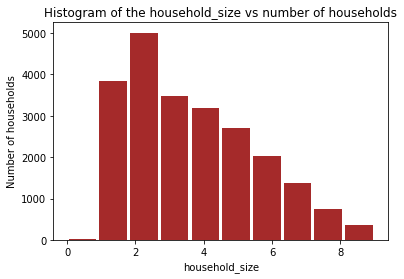

In [30]:
#creating a histogram for age of the respondent
household_sz = df['household_size']
plt.hist(household_sz, bins=10, histtype='bar', rwidth=0.9,color= "brown")
plt.title("Histogram of the household_size vs number of households")
plt.xlabel("household_size")
plt.ylabel("Number of households")
plt.show()

# Categorical Variables

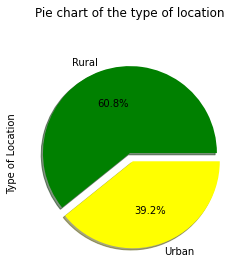

In [31]:

# Pie chart for type of location
df['Type of Location'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=['green','yellow'], autopct='%1.1f%%')
plt.title("Pie chart of the type of location", y=1.1)
plt.show()

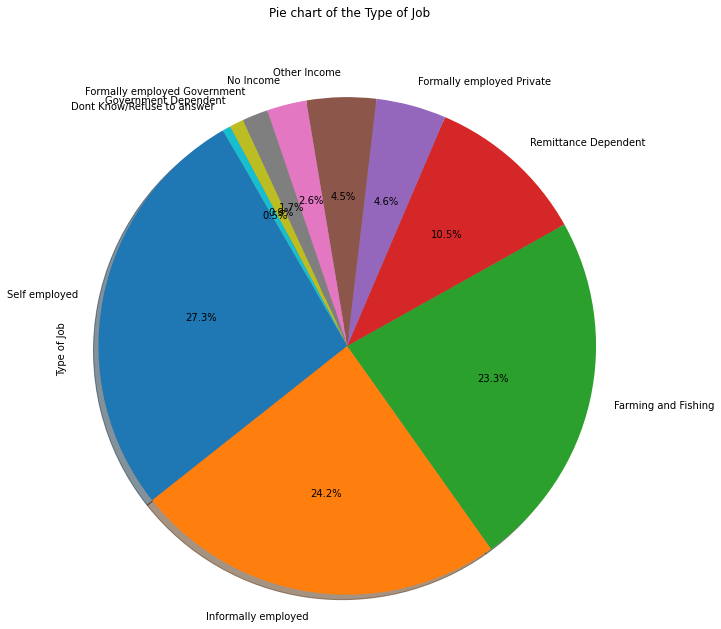

In [32]:
# Pie chart for Type of Job
df['Type of Job'].value_counts().plot(kind='pie',shadow = True,startangle = 120, autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.axis('equal')
plt.title("Pie chart of the Type of Job", y=1.1)
plt.show()


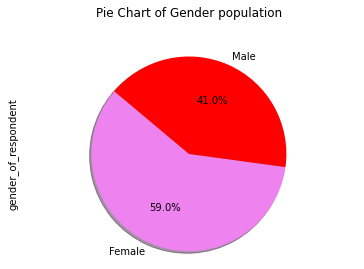

In [33]:
# Pie chart of gender distribution
#finance['gender_of_respondent'].value_counts().plot(kind='pie')
df['gender_of_respondent'].value_counts().plot(kind='pie',shadow = True,colors=['violet','red'],startangle = 140,autopct='%1.1f%%')
fig=plt.gcf()
plt.axis('equal')
#plt.legend(loc='upper right')
plt.title('Pie Chart of Gender population', y=1.1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


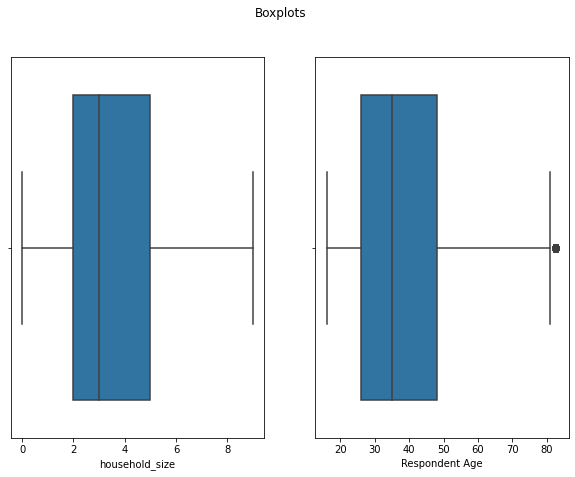

In [34]:
#Boxplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['household_size'], ax=ax1)
sns.boxplot(df['Respondent Age'], ax=ax2)
plt.show()

# Observation and recommendation



*   Most of the respondents live in rural areas
*   Most of the respondents are in the age group of 20 to 40 and are self-employed.
*   Most of the households has a household size of between 2 and 4. 
*   Most of the respondents interviewed were females

We would recommend that the financial service industries should target people in the rural areas because there is a large market that has not been tapped. Also, the people who are self emplyed should be targeted.









# 6.2 Bivariate analysis

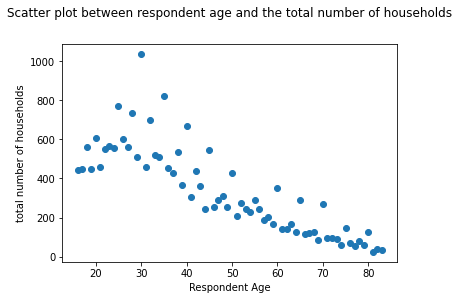

In [35]:
#scatter plots
# First we can group the respondents' ages by household sizes
grp=df.groupby('Respondent Age')['household_size'].count().reset_index(name='total number of households')
plt.scatter(grp["Respondent Age"] , grp["total number of households"])
plt.title("Scatter plot between respondent age and the total number of households", y=1.1)
plt.xlabel('Respondent Age')
plt.ylabel('total number of households')
plt.show()

In [36]:
#correlation between household size and respondent age
cor= df["household_size"].corr(df["Respondent Age"])
print("The correlation between the  two variables is: n/", cor) 

The correlation between the  two variables is: n/ -0.10620882169759871


Text(0.5, 1.1, 'Number of people with bank accounts vs Type of Location')

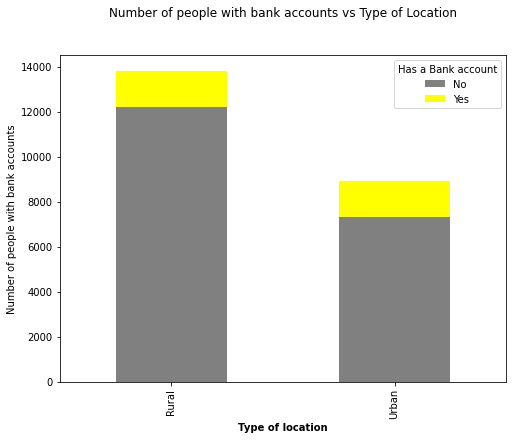

In [37]:
#Stacked column chart of type of location vs Has a bank account
#finance.head()
pd.crosstab(df['Type of Location'],df['Has a Bank account']).plot(kind="bar",stacked=True, figsize=(8,6), color=['grey','yellow'])
plt.xlabel("Type of location", fontsize=10, fontweight="bold")
plt.ylabel("Number of people with bank accounts")
plt.title("Number of people with bank accounts vs Type of Location", y=1.1)


Text(0.5, 1.1, 'Number of people with bank accounts vs Cell phone access')

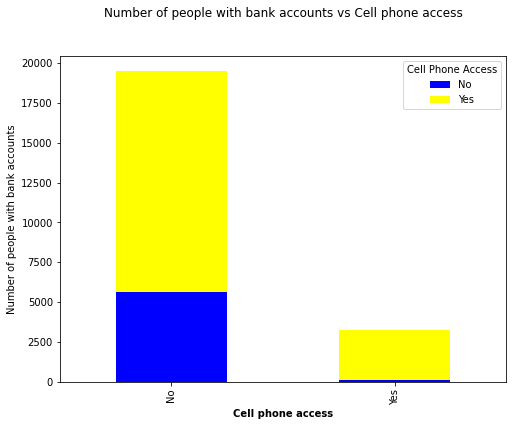

In [38]:
#comparison of the number of people with cellphone access and the people with bank acc
pd.crosstab(df['Has a Bank account'],df['Cell Phone Access']).plot(kind="bar",stacked=True, figsize=(8,6), color=['blue','yellow'])
plt.xlabel("Cell phone access", fontsize=10, fontweight="bold")
plt.ylabel("Number of people with bank accounts")
plt.title("Number of people with bank accounts vs Cell phone access", y=1.1)

In [39]:
# Z-test 
from scipy import stats
resp_age= df['Respondent Age']
hs_size= df['household_size']
age_zscore = stats.zscore(resp_age)
size_zscore = stats.zscore(hs_size)
print("The zscore for Respondents Age is:  n/",age_zscore)
print("The zscore for household size is:  n/",size_zscore)

The zscore for Respondents Age is:  n/ [-0.90776757  2.00255768 -0.78123169 ... -0.71796375 -0.71796375
 -0.52815993]
The zscore for household size is:  n/ [-0.2787056   0.68260346  0.68260346 ... -0.75936013  0.68260346
  1.64391252]


In [40]:
# T test
gender=df.groupby('Has a Bank account')['gender_of_respondent'].value_counts().reset_index(name='Count per gender')
gender

yes=gender.loc[(gender['Has a Bank account'] == 'Yes') & (gender['gender_of_respondent'])]
yes

no = gender.loc[(gender['Has a Bank account'] == 'No') & (gender['gender_of_respondent'])]
no

from scipy.stats import ttest_ind
t_stat,p = ttest_ind(yes['Count per gender'],no['Count per gender'])
print(f't={t_stat}, p={p}')

t=-3.6856998935788985, p=0.06636923564380036


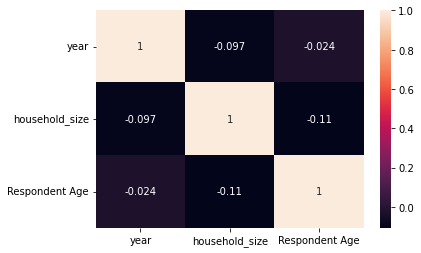

In [41]:
#Heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

# 6.3 Multivariate Analysis

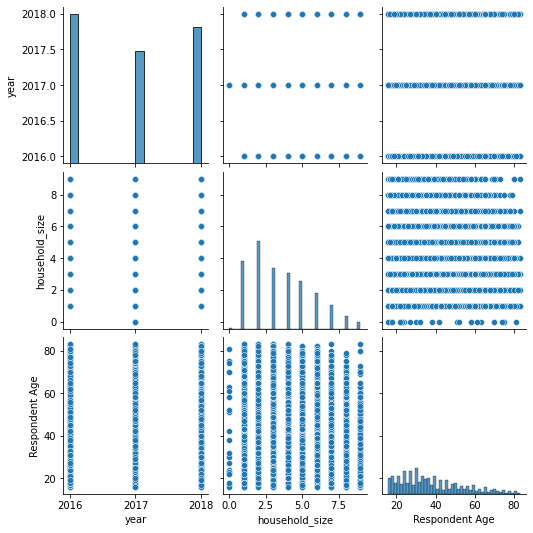

In [42]:
# We use a pairplot to show the relationship between all the variables in our dataset
sns.pairplot(data=df)
plt.show()

## 7. Implementing the Solution

Principal Component Analysis

In [43]:
# Implementing the Solution
# 
# Dimensionality Reduction Techniques
# PCA 
# Lets drop the year column since we won't use it 
df.drop('year', axis=1, inplace=True)
df.head(5)

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [44]:
# Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels.
# p are the feature variables while q are the corresponding labels

x = df.drop(['country', 'Has a Bank account', 'Type of Location', 'Cell Phone Access', 'gender_of_respondent', 'Level of Educuation', 'Type of Job'], axis=1)
y = df['Has a Bank account']

In [45]:
# The next preprocessing step is to divide data into training and test sets.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [46]:
# Normalization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [47]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [53]:
# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.55194796, 0.44805204])

In [50]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [51]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


## 8. Challenging the solution

Linear Discriminant Analysis (LDA)

In [58]:
#our dataset
df.head(5)

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [59]:
# Preprocessing
x = df.drop(['country', 'Has a Bank account', 'Type of Location', 'Cell Phone Access', 'gender_of_respondent', 'Level of Educuation', 'Type of Job'], axis=1)
y = df['Has a Bank account']

In [62]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [63]:
# Normalization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [64]:
# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(x_train, y_train)
X_test = lda.transform(x_test)

In [65]:
#Making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [66]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


 We can see that with one linear discriminant, the algorithm achieved an accuracy of 86%, which is the same as the accuracy achieved with one principal component, which was also 86%.
This means that we need more data in order to make our prediction



## 9. Follow up questions

> How does other finchech products like mobile banking and mobile money tranbsfer contribute to Finacial Inclusivity in East Africa?



### a). Did we have the right data?

Yes. 
Because we were able to detemine the number of people who have access to the bank within the rural and the urban areas. We were also able to consider other factors like job type, level of education,location type and other factors.

### b). Do we need other data to answer our question?

Yes.

We need data on other fintech products like mobile banking,mobile money transfer and other products that are highly encouraged to ensure financial inclusion in East Africa.

### c). Did we have the right question?

Yes we had the right question since the factors such as age, marital status, type of location, type of job and the level of education help drive the financial outcome of an individual. This will determanine whether one will have a bank account or not. 